# Calibration using Zhang's procedure

In [10]:
from matplotlib import pyplot as plt
import os
import numpy as np
import cv2 # OpenCV
from calibration import Calibrator

## 1. Calibrate using Zhang procedure, i.e., find the intrinsic parameters K and, for each image, the pair of R, t (extrinsic);

In [11]:
calibrator = Calibrator((9,6), 24/1000)

folderpath = './phone_images2'
images_path = [os.path.join(folderpath, imagename) for imagename in os.listdir(folderpath) if imagename.endswith(".JPG")]
images_path.sort()
limages = []

for path in images_path:
    image = cv2.imread(path)
    limages.append(image)

calibrator.fit(limages, radial_distortion=False, iterative=False)
print("K:",calibrator.K)
print("Rotation matrices:")
for i,R in enumerate(calibrator.rotations):
   print(f"R{i+1}:{R}")
print("Translation vectors:")
for i,t in enumerate(calibrator.translations):
    print(f"t{i+1}:{t}")
print(calibrator.projection_matrices[7])

K: [[1.42058480e+03 2.73305499e+01 4.93549461e+02]
 [0.00000000e+00 1.39260893e+03 7.61633815e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Rotation matrices:
R1:[[ 0.68341004  0.72810122 -0.05309726]
 [ 0.68012495 -0.66143245 -0.3161284 ]
 [-0.26529372  0.17993255 -0.94722939]]
R2:[[-0.83118568 -0.13436091  0.539516  ]
 [-0.06243442  0.98677949  0.14955996]
 [-0.55247834  0.09062773 -0.82858572]]
R3:[[-0.77106172  0.63317862  0.06744381]
 [ 0.53596792  0.70254774 -0.46815068]
 [-0.3438055  -0.32482535 -0.88107109]]
R4:[[ 0.56456965  0.41306963 -0.71458701]
 [ 0.5023607  -0.85890313 -0.09959486]
 [-0.65490063 -0.30275219 -0.69242059]]
R5:[[ 0.85980396 -0.12109378  0.49605791]
 [-0.14498478 -0.98938558  0.00977717]
 [ 0.48960858 -0.0803273  -0.86823439]]
R6:[[-0.82773975  0.03616989 -0.55994522]
 [ 0.00888059  0.9986397   0.05137979]
 [ 0.56104192  0.03755645 -0.82693499]]
R7:[[-0.43281774 -0.60699532 -0.66650242]
 [-0.55632816  0.76160987 -0.33233928]
 [ 0.70934321  0.22695173 

## 2. Choose one of the calibration images and compute the total reprojection error for all the grid points (adding a figure with the reprojected points);
We will perform the procedure on the 8-th image, first with the basic procedure then with the iterative one
### Basic procedure

[np.float64(335.72394817284015), np.float64(2373.248301971988), np.float64(365.3129003652722), np.float64(1674.7821315931003), np.float64(5369.317839000825), np.float64(3366.0817071907677), np.float64(4937.434448397335), np.float64(2533.8337281757963), np.float64(978.541380681245), np.float64(1346.6242964406326), np.float64(5133.477246040594), np.float64(415.88820298153246), np.float64(575.7870394342095), np.float64(1363.946532804604), np.float64(850.0347319933796), np.float64(466.42523823986596), np.float64(1049.3204310004298), np.float64(2735.6202835943604), np.float64(1437.5820719543751), np.float64(182.21511309016336)]


Text(0.5, 1.0, 'Total reprojection error: 2533.8337281757963')

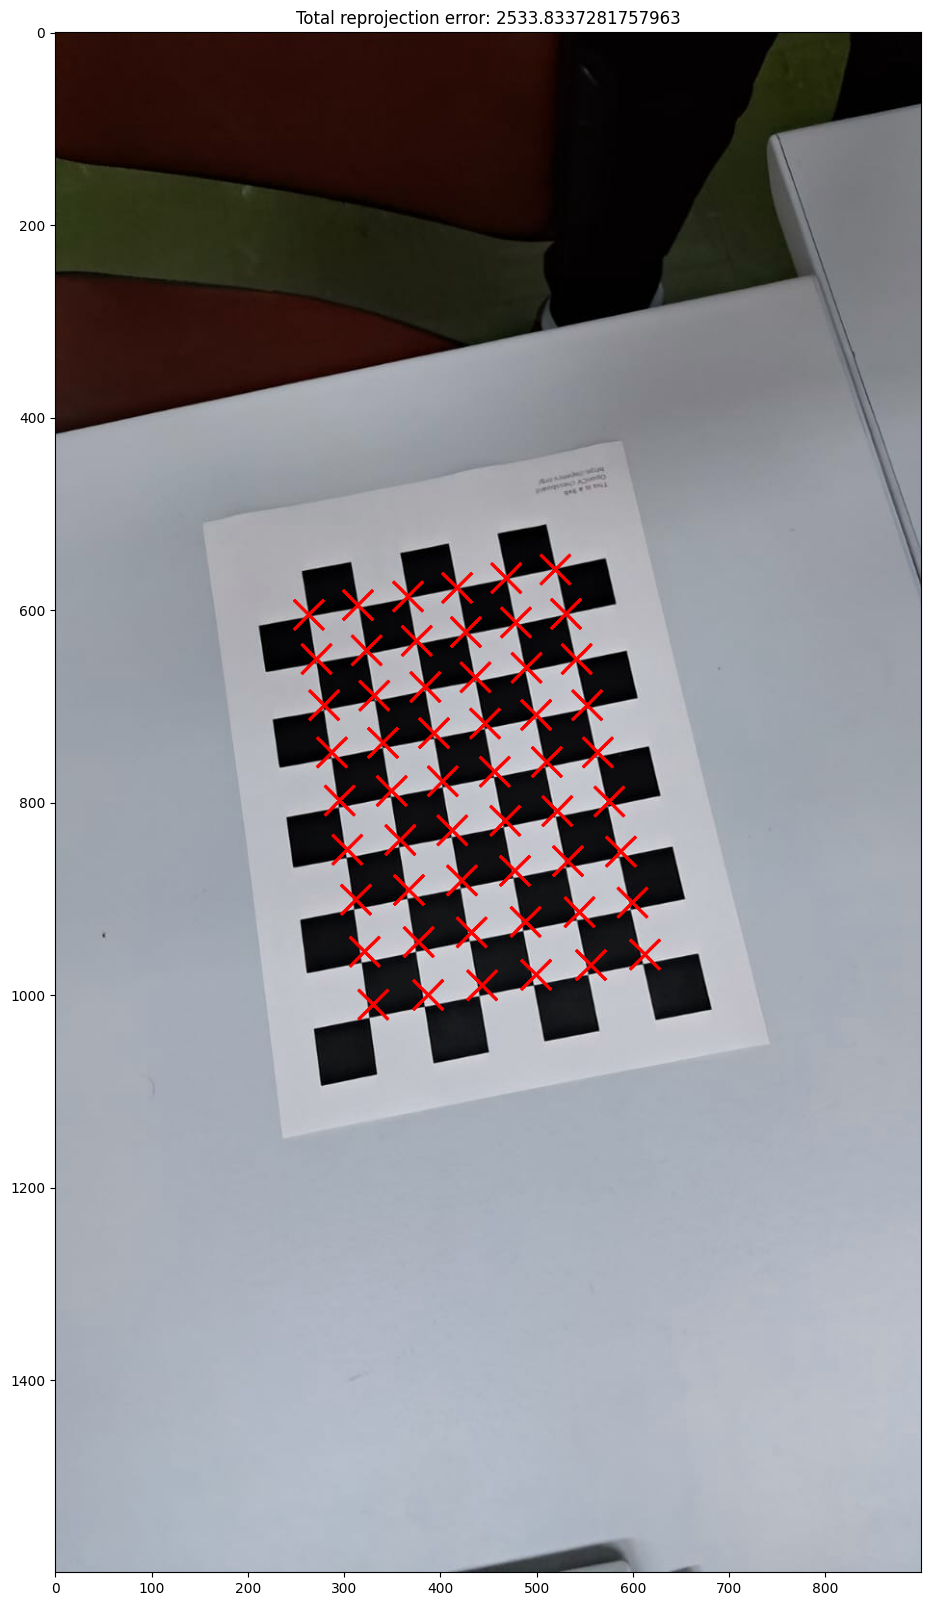

In [12]:
calibrator.fit(limages, radial_distortion=False, iterative=False)
print(calibrator.reprojection_errors)
index = 7
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=2,
                           markerSize=30
                           )
noi_nor = calibrator.reprojection_errors
plt.figure(figsize=(20,20))
plt.imshow(copy1)
plt.title(f"Total reprojection error: {error}")

### Iterative refinement

[np.float64(23.650465668830538), np.float64(35.154183265852964), np.float64(45.70696452069899), np.float64(32.13983499150326), np.float64(84.57403788394984), np.float64(22.656925303683636), np.float64(22.175920057756187), np.float64(40.355679445055756), np.float64(44.989861446758795), np.float64(33.99548003355326), np.float64(52.72525319890751), np.float64(38.15998512392774), np.float64(42.13286624637547), np.float64(41.97292950513471), np.float64(41.900042257418164), np.float64(49.408018230537344), np.float64(34.016392742385946), np.float64(20.422271055080905), np.float64(59.01788221312507), np.float64(42.318399209690845)]
[[-1.31077374e+03  1.10333088e+02 -5.75756508e+02  3.21280364e+02]
 [ 2.84340918e+02  1.03796336e+03 -1.09726560e+03  3.44293441e+02]
 [ 3.66387239e-02 -2.92746163e-01 -9.55487984e-01  6.17485792e-01]]


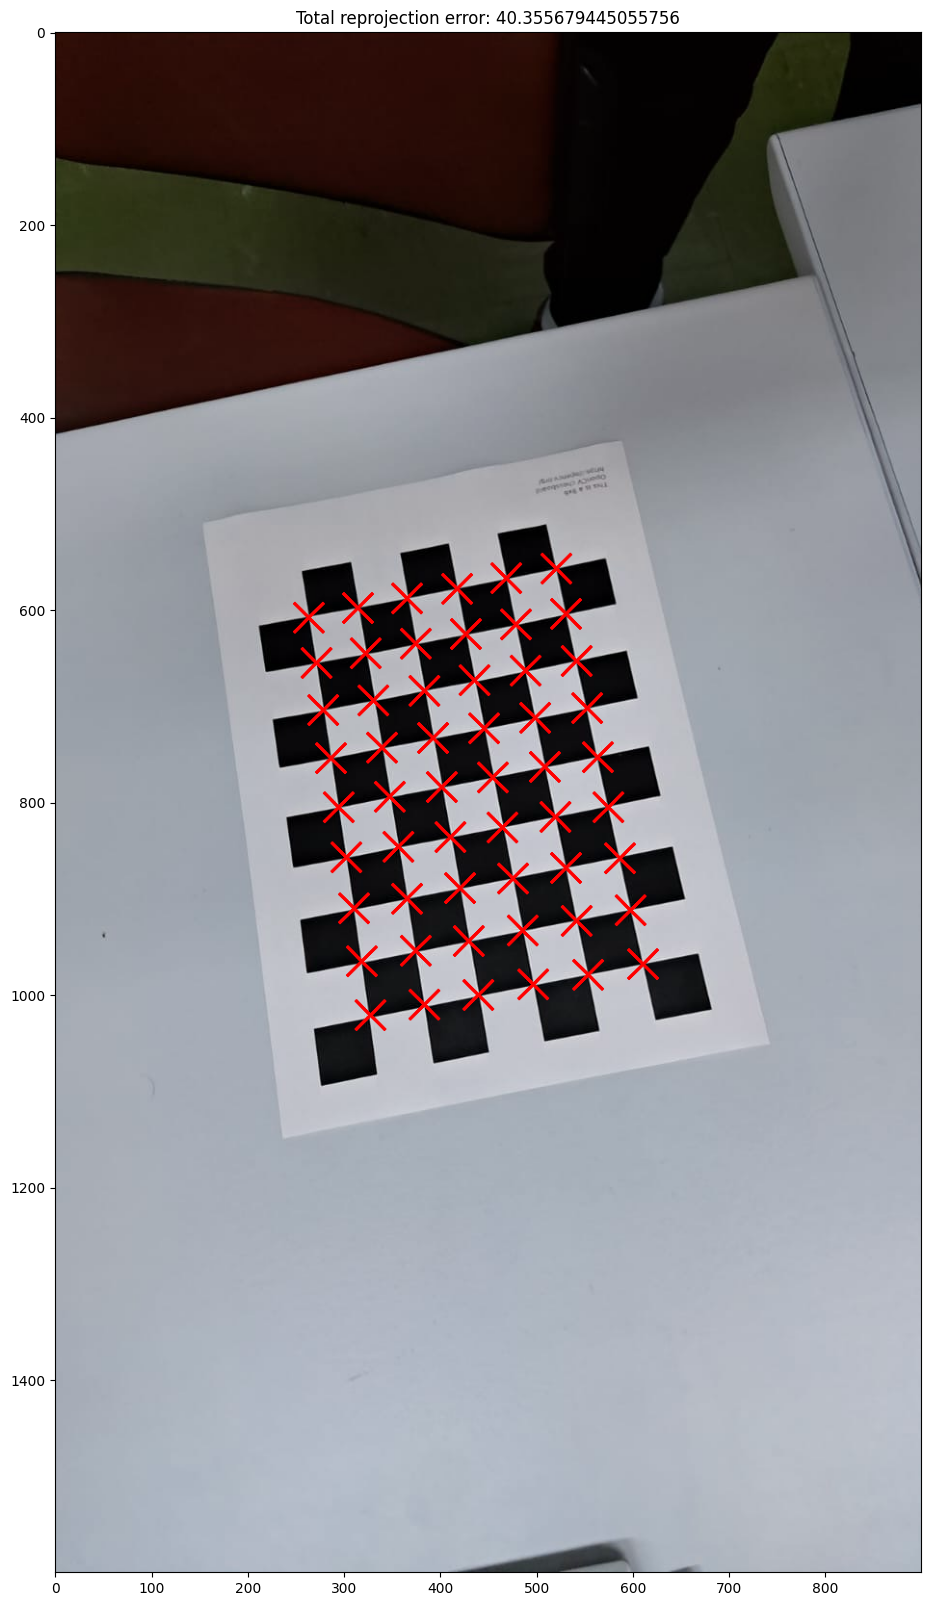

In [13]:
calibrator.fit(limages, radial_distortion=False, iterative=True)
print(calibrator.reprojection_errors)
index = 7
R, P, error = calibrator.real_coords, calibrator.projection_matrices[index], calibrator.reprojection_errors[index]
image7 = cv2.imread(images_path[index])
proj_chess = np.transpose(P@R.T)
proj_chess[:,0] = proj_chess[:,0]/proj_chess[:,2]
proj_chess[:,1] = proj_chess[:,1]/proj_chess[:,2]
proj_chess = proj_chess[:,:-1]
copy1 = image7.copy()
for point in proj_chess:
    copy1 = cv2.drawMarker(img=copy1,
                           position=tuple(np.array(point, dtype=np.int32)),
                           color=(255,0,0),
                           markerType=cv2.MARKER_TILTED_CROSS,
                           thickness=2,
                           markerSize=30
                           )
i_nor = calibrator.reprojection_errors
plt.figure(figsize=(20,20))
plt.imshow(copy1)
plt.title(f"Total reprojection error: {error}")
print(calibrator.projection_matrices[7])

## 3. Superimpose an object (for instance, a cylinder), to the calibration plane, in all the images employed for the calibration;

In [14]:
# Funzione generata con Microsoft Copilot
def create_image_grid(image_list, grid_size, is_bw=False):
    rows, cols = grid_size
    if len(image_list) != rows * cols:
        raise ValueError("Il numero di immagini non corrisponde alla dimensione della griglia")

    img_height, img_width = image_list[0].shape[:2]

    if not is_bw:
        grid_image = np.zeros((rows * img_height, cols * img_width, 3), dtype=np.uint8)
    else:
        grid_image = np.zeros((rows * img_height, cols * img_width), dtype=np.uint8)

    for idx, img in enumerate(image_list):
        row = idx // cols
        col = idx % cols
        grid_image[row * img_height:(row + 1) * img_height, col * img_width:(col + 1) * img_width] = img

    return grid_image

In [15]:
pts = cv2.ellipse2Poly((96,120), (48,48), 0, 0, 360, 1)
pts = pts/1000
et_low = np.empty_like(pts)
et_high = np.empty_like(et_low)
pts_low = np.hstack((pts, np.zeros((pts.shape[0],1)), np.ones((pts.shape[0],1))))
pts_high = np.hstack((pts, np.full((pts.shape[0],1), 0.120), np.ones((pts.shape[0],1))))

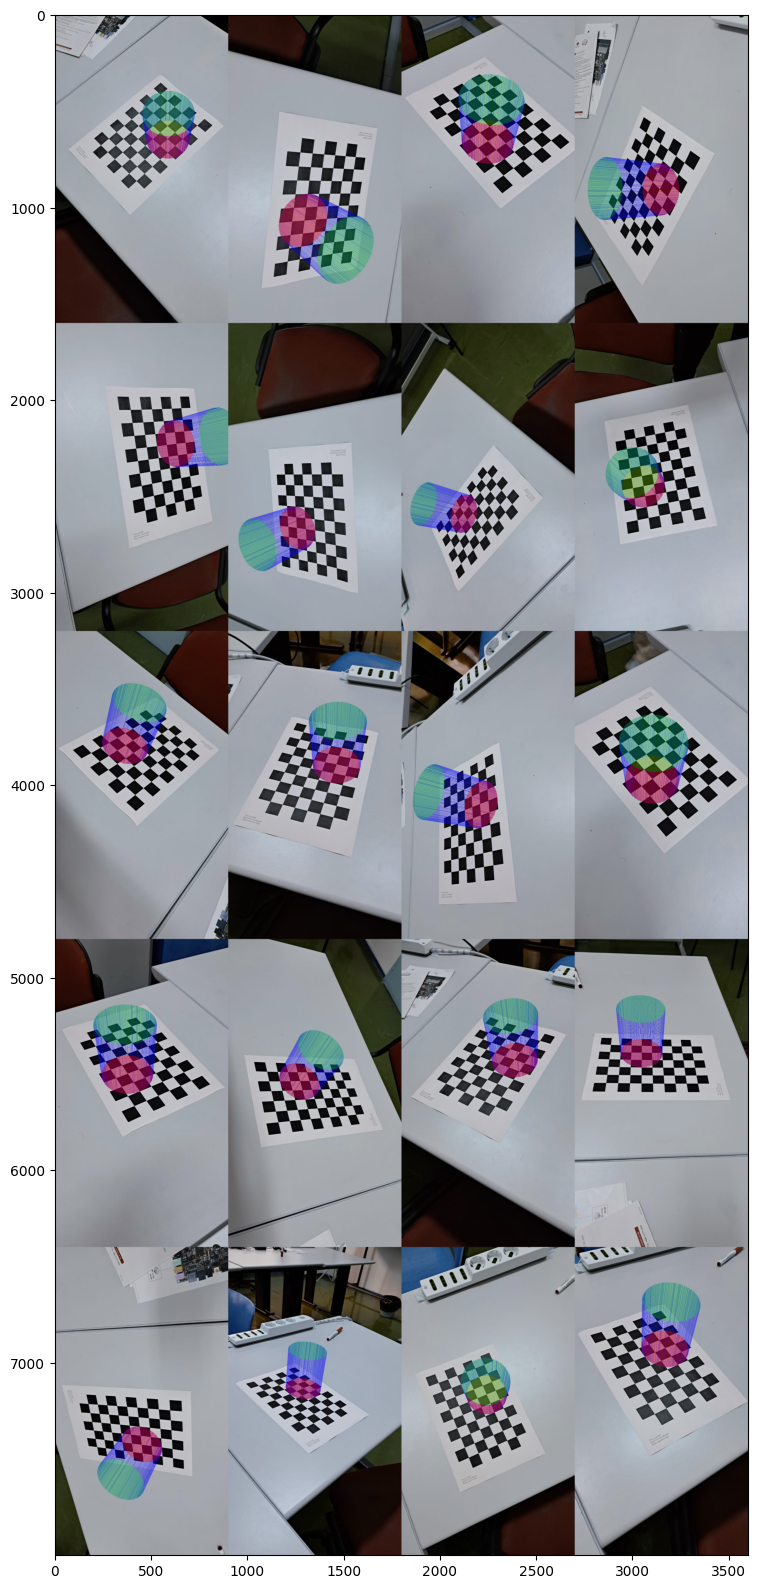

In [16]:
image_list = []
for i,path in enumerate(images_path):
    original = cv2.imread(path)
    P = calibrator.projection_matrices[i]

    proj_low = np.transpose(P @ pts_low.T)
    et_low[:,0] = proj_low[:,0]/proj_low[:,2]
    et_low[:,1] = proj_low[:,1]/proj_low[:,2]

    proj_high = np.transpose(P @ pts_high.T)
    et_high[:,0] = proj_high[:,0]/proj_high[:,2]
    et_high[:,1] = proj_high[:,1]/proj_high[:,2]

    img2 = original.copy()
    img2 = cv2.fillConvexPoly(img2,np.array(et_low, dtype=np.int32),(255,0,0))
    img3 = cv2.fillConvexPoly(img2.copy(),np.array(et_high, dtype=np.int32),(0,255,0))
    img4 = original.copy()
    for i in range(et_low.shape[0]):
        img4 = cv2.line(img4, tuple(np.array(et_low[i], dtype=np.int32)), tuple(np.array(et_high[i], dtype=np.int32)),(0,0,255))
    img2 = cv2.addWeighted(img2, 0.5, original, 0.5, 0)
    img3 = cv2.addWeighted(img2, 0.5, img3, 0.5, 0)
    img4 = cv2.addWeighted(img3, 0.5, img4, 0.5, 0)
    image_list.append(img4)

compound = create_image_grid(image_list, (5,4))
plt.figure(figsize=(20,20))
plt.imshow(compound)

[np.float64(9.258799604305542), np.float64(14.528957496885267), np.float64(9.8904726596638), np.float64(14.740418146873834), np.float64(21.885907679535297), np.float64(12.161776576010435), np.float64(17.701316429024644), np.float64(4.40456955647653), np.float64(14.224483733243133), np.float64(15.380237989925448), np.float64(13.004021936172332), np.float64(8.180963071716283), np.float64(13.778161735616235), np.float64(33.05448797179003), np.float64(11.866222382148274), np.float64(17.09999734743239), np.float64(18.650679770102396), np.float64(15.699519856616659), np.float64(9.870145060957373), np.float64(15.883307989153943)]
[[198 192 176 ... 254 254 254]
 [205 199 185 ... 254 254 254]
 [213 208 195 ... 254 254 254]
 ...
 [ 34  40  44 ... 253 253 252]
 [ 41  44  50 ... 251 251 251]
 [ 44  54  56 ... 250 250 250]] 0 255


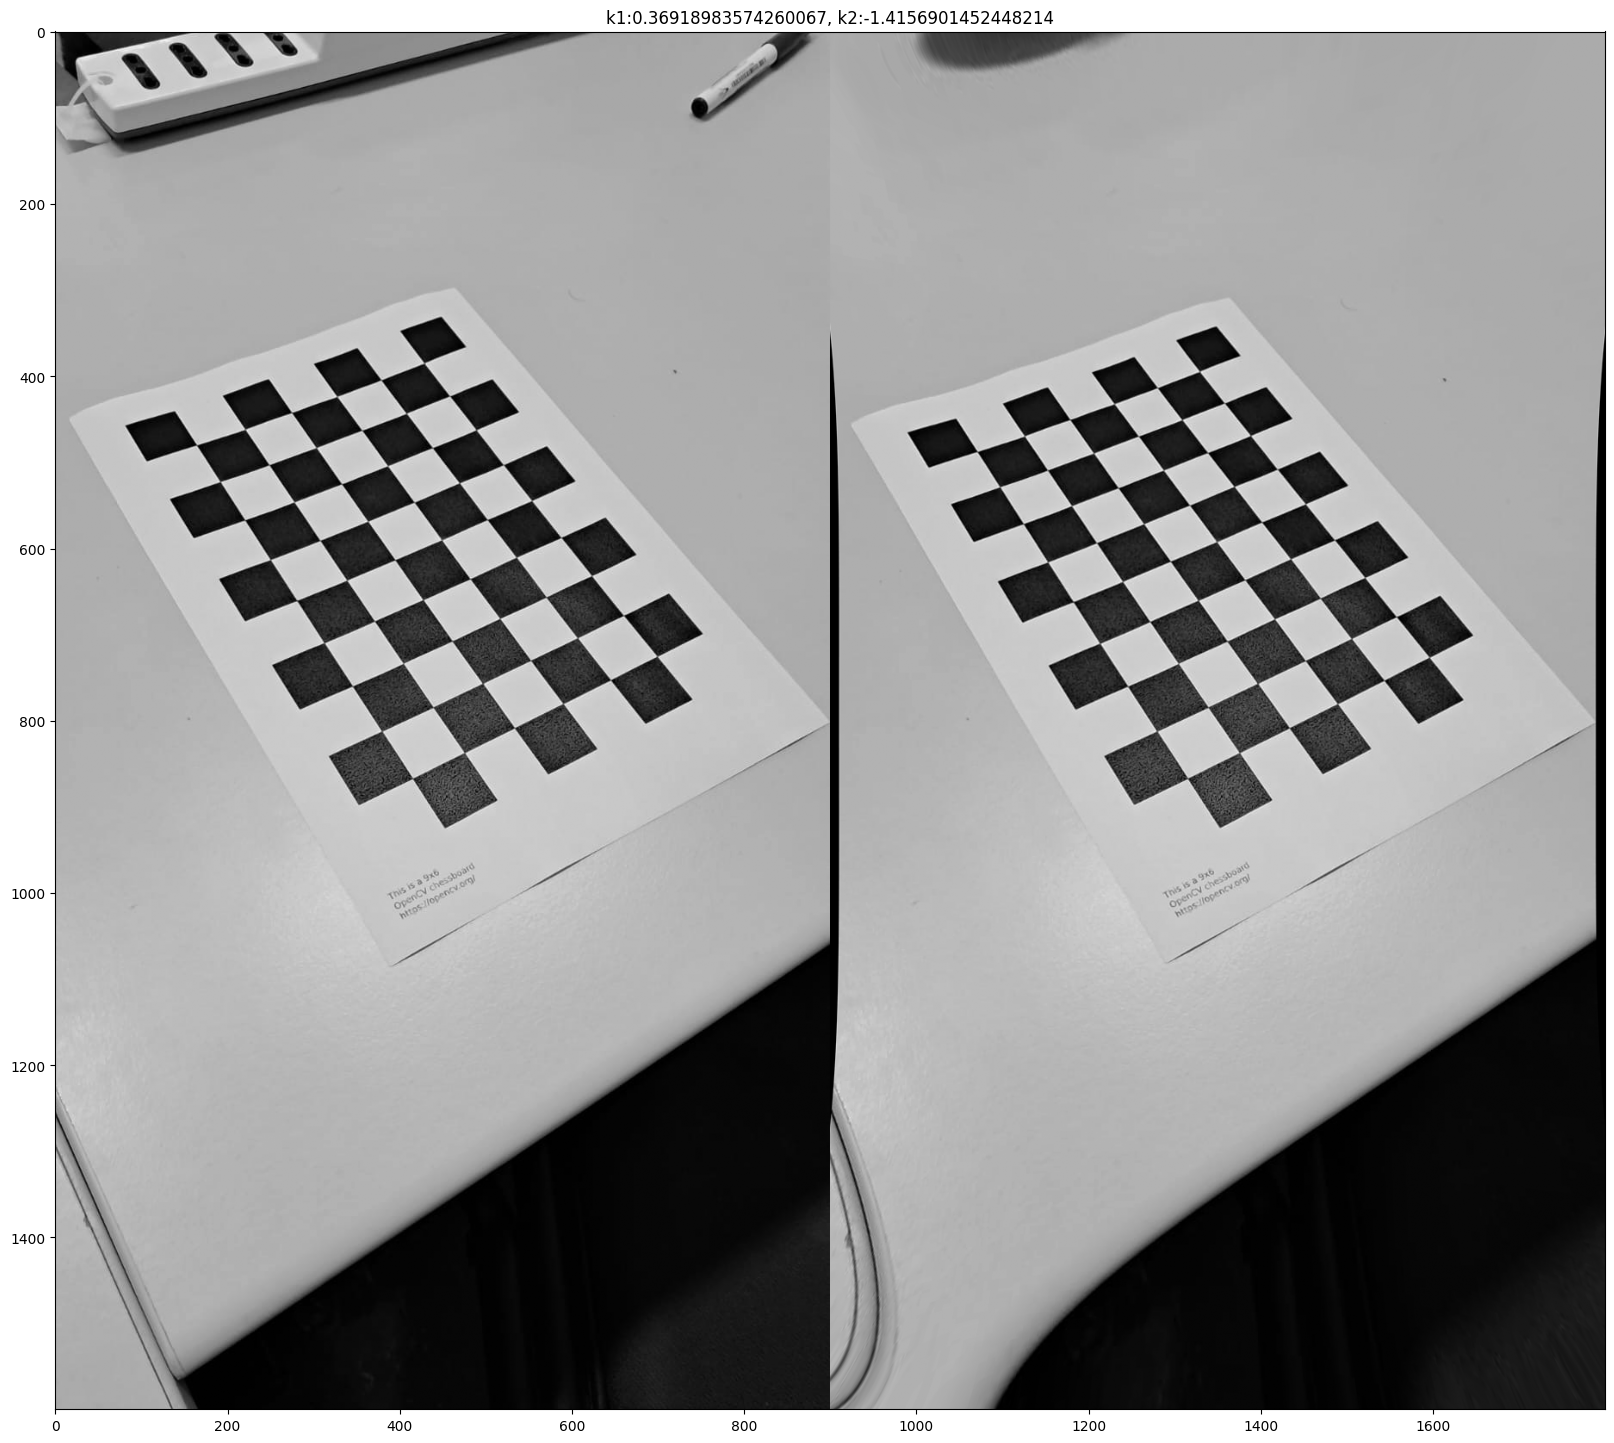

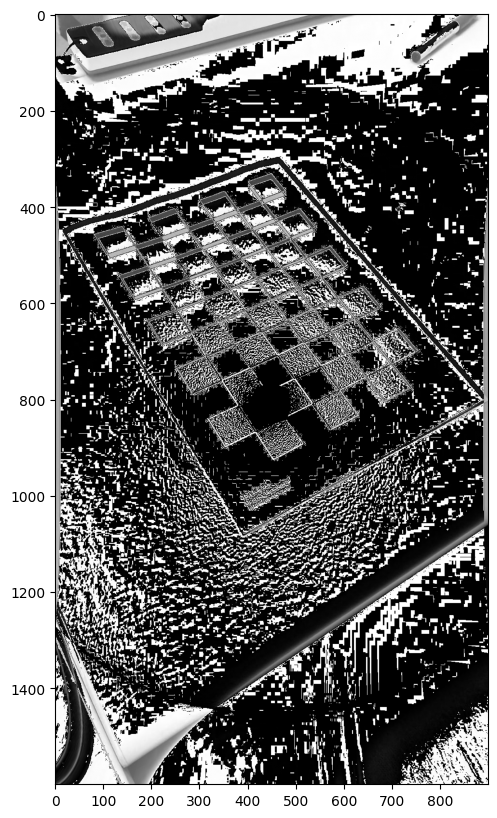

In [17]:
calibrator.fit(limages, radial_distortion=True, iterative=True)
print(calibrator.reprojection_errors)
index = 19
image7 = cv2.imread(images_path[index])
image7 = cv2.cvtColor(image7.copy(), cv2.COLOR_BGR2GRAY)
undistorted7 = calibrator.compensate_radial_distortion(image7)
limage1 = [image7, undistorted7]
compound = create_image_grid(limage1, (1,2), True)
diff = image7 - undistorted7
ir = calibrator.reprojection_errors
print(diff, np.min(diff), np.max(diff))
plt.figure(figsize=(20,20))
plt.imshow(compound, cmap='gray')
plt.title(f"k1:{calibrator.distortion_parameters[0]}, k2:{calibrator.distortion_parameters[1]}")

plt.figure(figsize=(10,10))
plt.imshow(diff, cmap='gray')

[np.float64(9.258799604305542), np.float64(14.528957496885267), np.float64(9.8904726596638), np.float64(14.740418146873834), np.float64(21.885907679535297), np.float64(12.161776576010435), np.float64(17.701316429024644), np.float64(4.40456955647653), np.float64(14.224483733243133), np.float64(15.380237989925448), np.float64(13.004021936172332), np.float64(8.180963071716283), np.float64(13.778161735616235), np.float64(33.05448797179003), np.float64(11.866222382148274), np.float64(17.09999734743239), np.float64(18.650679770102396), np.float64(15.699519856616659), np.float64(9.870145060957373), np.float64(15.883307989153943)]
[np.float64(335.72394817284015), np.float64(2373.248301971988), np.float64(365.3129003652722), np.float64(1674.7821315931003), np.float64(5369.317839000825), np.float64(3366.0817071907677), np.float64(4937.434448397335), np.float64(2533.8337281757963), np.float64(978.541380681245), np.float64(1346.6242964406326), np.float64(5133.477246040594), np.float64(415.88820298

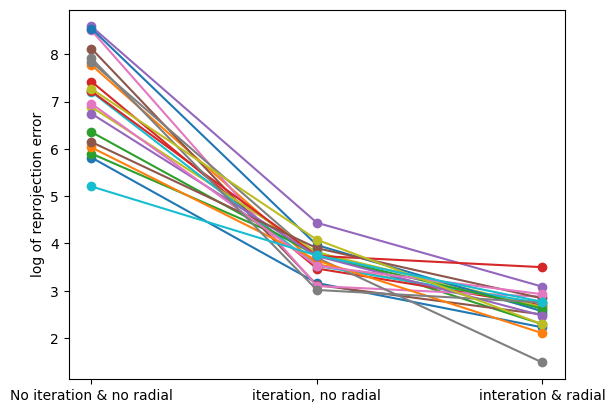

In [24]:
print(ir)
print(noi_nor)
print(i_nor)

for i in range(len(ir)):
    plt.plot([0, 1, 2], [np.log(noi_nor[i]), np.log(i_nor[i]), np.log(ir[i])], 'o-')
    plt.xticks(ticks=[0, 1, 2], labels=['No iteration & no radial', 'iteration, no radial', 'interation & radial'])
    plt.ylabel('log of reprojection error')